# Week 2 Data Exploration

In [3]:
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt


#get drug data from original data source
filepath = 'https://raw.githubusercontent.com/nikhsakhamuri/PYT303_PharmCost/main/PharmaceuticalCostsbyCountry.csv'
drugs = pd.read_csv(filepath)

In [4]:
#get population from original data source
filepathpopulation = 'https://raw.githubusercontent.com/nikhsakhamuri/PYT303_PharmCost/main/populationdata.csv'
populationData = pd.read_csv(filepathpopulation)

In [5]:
drugs

## PC_HEALTHXP = Percent of Health Spending
## PC_GDP = Percent of GDP
## USD_CAP = US Dollars Per Capita
## TOTAL_SPEND is calculated using US Dollars Per Capita and population data measured in millions of USD
## Based on US GDP numbers and expenses

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30


In [6]:
populationData

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [7]:
drugs['Year']=drugs['TIME']
drugs['Country Code']=drugs['LOCATION']
mergedData = drugs.merge(populationData,on=["Country Code","Year"])

In [8]:
mergedData.head(10)
## PC_HEALTHXP = Percent of Health Spending
## PC_GDP = Percent of GDP
## USD_CAP = US Dollars Per Capita
## TOTAL_SPEND is calculated using US Dollars Per Capita and population data

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value
0,AUS,1971,15.992,0.727,35.720,NaN,462.11,1971,AUS,Australia,12937000
1,AUS,1972,15.091,0.686,36.056,NaN,475.11,1972,AUS,Australia,13177000
2,AUS,1973,15.117,0.681,39.871,NaN,533.47,1973,AUS,Australia,13380000
3,AUS,1974,14.771,0.755,47.559,NaN,652.65,1974,AUS,Australia,13723000
4,AUS,1975,11.849,0.682,47.561,NaN,660.76,1975,AUS,Australia,13893000
5,AUS,1976,10.920,0.630,46.908,NaN,658.26,1976,AUS,Australia,14033000
6,AUS,1977,10.087,0.613,47.649,NaN,676.23,1977,AUS,Australia,14192000
7,AUS,1978,9.958,0.591,50.799,NaN,729.37,1978,AUS,Australia,14358000
8,AUS,1979,8.981,0.523,49.766,NaN,722.30,1979,AUS,Australia,14514000
9,AUS,1980,9.263,0.540,56.972,NaN,837.03,1980,AUS,Australia,14692000


In [9]:
mergedData.tail()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70,2012,LTU,Lithuania,2987773
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02,2013,LTU,Lithuania,2957689
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92,2014,LTU,Lithuania,2932367
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30,2015,LTU,Lithuania,2904910
1035,RUS,2015,22.939,1.286,309.900,NaN,44655.62,2015,RUS,Russian Federation,144096870


In [10]:
mergedData.shape

(1036, 11)

In [11]:
mergedData.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Year,Value
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1.036000e+03
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118,1996.809846,2.947308e+07
std,12.498330,6.389064,0.465635,209.152134,34878.286123,12.498330,4.588794e+07
min,1970.000000,5.545000,0.207000,3.160000,6.290000,1970.000000,2.044380e+05
25%,1987.000000,11.516250,0.768250,111.098500,728.180000,1987.000000,5.114146e+06
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000,1999.000000,1.022776e+07
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000,2007.000000,4.062733e+07
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000,2016.000000,3.206352e+08


In [12]:
mergedData.info()
## all columns excep for FLAG_CODES have complete data
## Couldn't find documentation on FLAG_CODES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1035
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOCATION      1036 non-null   object 
 1   TIME          1036 non-null   int64  
 2   PC_HEALTHXP   1036 non-null   float64
 3   PC_GDP        1036 non-null   float64
 4   USD_CAP       1036 non-null   float64
 5   FLAG_CODES    63 non-null     object 
 6   TOTAL_SPEND   1036 non-null   float64
 7   Year          1036 non-null   int64  
 8   Country Code  1036 non-null   object 
 9   Country Name  1036 non-null   object 
 10  Value         1036 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 97.1+ KB


In [13]:
mergedData['LOCATION'].unique()
## every country is properly cased, no need to manipulate this data

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'EST', 'SVN', 'ISR', 'LVA', 'LTU', 'RUS'],
      dtype=object)

In [14]:
mergedData['LOCATION'].value_counts()
## some countries have more records than others

NOR    47
KOR    47
SWE    46
FIN    46
ISL    46
DEU    45
CAN    45
AUS    44
NLD    43
IRL    41
BEL    41
PRT    39
DNK    36
ESP    32
JPN    32
GBR    31
CHE    31
FRA    30
ITA    29
GRC    27
CZE    26
AUT    26
NZL    24
HUN    22
LUX    21
SVK    17
MEX    17
EST    17
USA    16
POL    14
SVN    14
LVA    12
LTU    12
TUR    11
ISR     8
RUS     1
Name: LOCATION, dtype: int64

In [15]:
mergedData.loc[drugs['PC_GDP'] >= 2,:]
#Countries by year where spending on pharmaceutical drugs made up 2% or more of GDP

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value
356,GRC,2005,22.338,2.010,514.010,NaN,5647.59,2005,GRC,Greece,10987314
357,GRC,2006,23.613,2.117,604.089,NaN,6657.28,2006,GRC,Greece,11020362
358,GRC,2007,25.798,2.337,684.401,NaN,7561.59,2007,GRC,Greece,11048473
359,GRC,2009,27.171,2.573,782.011,B,8685.81,2009,GRC,Greece,11107017
360,GRC,2010,28.633,2.737,771.997,NaN,8585.64,2010,GRC,Greece,11121341
361,GRC,2011,30.742,2.797,731.159,NaN,8119.45,2011,GRC,Greece,11104899
362,GRC,2012,29.055,2.550,644.747,NaN,7121.24,2012,GRC,Greece,11045011
363,GRC,2013,27.742,2.312,603.509,NaN,6617.60,2013,GRC,Greece,10965211
364,GRC,2014,26.701,2.120,560.435,NaN,6104.49,2014,GRC,Greece,10892413
365,GRC,2015,25.878,2.170,571.913,NaN,6188.60,2015,GRC,Greece,10820883


# Week 3 Data Analysis

In [16]:
TimeGroup = mergedData.groupby(by='TIME')

In [17]:
TimeGroup['TIME'].value_counts().sort_values(ascending = False)
#fewer records in previous years, this will bias more towards recent data

#Based on data exploration, we will analyze 2013 because it has the most observations and is the most recent year with 33 observations


TIME  TIME
2007  2007    33
2013  2013    33
2006  2006    33
2010  2010    32
2012  2012    32
2005  2005    32
2011  2011    32
2009  2009    32
2014  2014    32
2008  2008    31
2004  2004    31
2015  2015    30
2003  2003    28
2002  2002    28
2001  2001    26
2000  2000    26
1997  1997    25
1996  1996    25
1995  1995    25
1999  1999    24
1994  1994    24
1990  1990    24
1992  1992    23
1993  1993    23
1991  1991    22
1998  1998    21
1989  1989    20
1985  1985    20
1988  1988    20
1987  1987    19
1986  1986    19
1980  1980    18
1984  1984    18
1982  1982    17
1981  1981    17
1983  1983    17
1979  1979    13
1978  1978    13
1977  1977    13
1976  1976    13
1975  1975    13
1970  1970    11
1971  1971    11
1974  1974    11
1973  1973    11
1972  1972    11
2016  2016     4
Name: TIME, dtype: int64

In [18]:
TimeGroup['TOTAL_SPEND'].mean()
# I would exclude 2016 since there were only 4 countries with data. Including 2016 would show a large drop off 
# in mean TOTAL_SPEND because of this.
# We also want to take note of 1979-1981. There number of countries by year are as follows: 1979 - 13, 1980 - 18, 1981 - 17
# The average amounts spent on drugs were as follows: 1979 - $1401, 1980 - $2410, 1981 - $1634
# We need to analyze which countries were included in each year to pinpoint which observations caused such a drastic change



TIME
1970      803.089091
1971      689.315455
1972      789.090000
1973      872.162727
1974     1000.206364
1975     1258.965385
1976     1036.916154
1977     1129.002308
1978     1266.763077
1979     1400.553077
1980     2410.343333
1981     1634.228824
1982     1765.394118
1983     1897.111765
1984     2927.583333
1985     3348.380000
1986     3232.742632
1987     3552.458947
1988     4401.880500
1989     4803.392000
1990     5017.249583
1991     4683.874091
1992     5841.125217
1993     6084.876957
1994     6274.270417
1995     6375.195200
1996     6734.855600
1997     7017.980000
1998     7789.256667
1999     7878.379583
2000    13773.076923
2001    15100.737692
2002    15654.886071
2003    17394.439643
2004    16813.695806
2005    17550.538750
2006    18320.733636
2007    19326.786970
2008    21089.417742
2009    21779.118437
2010    22301.883125
2011    22829.922500
2012    23016.526250
2013    23860.912121
2014    25910.645313
2015    25651.457000
2016    18729.265000
Name: TO

In [19]:
locations_2016 = mergedData.loc[drugs['TIME'] == 2016,:]

In [20]:
locations_2016_array = locations_2016['LOCATION'].unique()
locations_2016_array

array(['ITA', 'KOR', 'NLD', 'NOR'], dtype=object)

In [21]:
mergedData['TOTAL_SPEND'][drugs['LOCATION'].isin(locations_2016_array)].mean()
# The average TOTAL_SPEND for the entire data set when only including the 4 countries from 2016

8190.796867469884

In [22]:
mergedData['TOTAL_SPEND'][~mergedData['LOCATION'].isin(locations_2016_array)].mean()
# This code only includes countries that were not in 2016. On average, the countries that were not in 2016 spent $12,447.48
# in total on drugs, whereas the countries included 2016 only spent $8,190.80 on average. We should expect to see a lower
# average amount spent on drugs for 2016.

12447.478241379322

In [23]:
#Calculate the Total Healthcare Expenditure in mill USD 
mergedData['Total HC Exp in mill USD'] = mergedData.apply(lambda x: x['TOTAL_SPEND'] / (x['PC_HEALTHXP']/100), axis=1)

In [24]:


#Calculate the GDP (PPP) in mill USD 

mergedData['GDP (PPP) in mill USD'] = mergedData.apply(lambda x: x['TOTAL_SPEND'] / (x['PC_GDP']/100), axis=1)
#Calculate the Population in mill

mergedData['Pop in mill'] = mergedData.apply(lambda x: x['TOTAL_SPEND'] / x['USD_CAP'], axis=1)
#Calculate the GDP (PPP) per Capita in USD 

mergedData['GDP (PPP) per Capita in USD'] = mergedData.apply(lambda x: x['GDP (PPP) in mill USD'] / x['Pop in mill'], axis=1)

In [25]:
mergedData.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value,Total HC Exp in mill USD,GDP (PPP) in mill USD,Pop in mill,GDP (PPP) per Capita in USD
0,AUS,1971,15.992,0.727,35.720,NaN,462.11,1971,AUS,Australia,12937000,2889.632316,63563.961486,12.937010,4913.342503
1,AUS,1972,15.091,0.686,36.056,NaN,475.11,1972,AUS,Australia,13177000,3148.300311,69258.017493,13.177002,5255.976676
2,AUS,1973,15.117,0.681,39.871,NaN,533.47,1973,AUS,Australia,13380000,3528.940927,78336.270191,13.379900,5854.772394
3,AUS,1974,14.771,0.755,47.559,NaN,652.65,1974,AUS,Australia,13723000,4418.455081,86443.708609,13.722955,6299.205298
4,AUS,1975,11.849,0.682,47.561,NaN,660.76,1975,AUS,Australia,13893000,5576.504346,96885.630499,13.892895,6973.753666


In [147]:
mergedData_2013 = mergedData.loc[mergedData['TIME'] == 2013,:]
mergedData_2013

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value,Total HC Exp in mill USD,GDP (PPP) in mill USD,Pop in mill,GDP (PPP) per Capita in USD
42,AUS,2013,14.989,1.320,627.402,NaN,14503.87,2013,AUS,Australia,23128129,9.676343e+04,1.098778e+06,23.117347,47530.454545
67,AUT,2013,12.222,1.245,594.130,NaN,5037.85,2013,AUT,Austria,8479823,4.121952e+04,4.046466e+05,8.479373,47721.285141
108,BEL,2013,14.273,1.480,642.958,NaN,7190.08,2013,BEL,Belgium,11159407,5.037539e+04,4.858162e+05,11.182814,43443.108108
154,CAN,2013,17.575,1.778,783.949,NaN,27560.08,2013,CAN,Canada,35082954,1.568141e+05,1.550061e+06,35.155450,44091.619798
179,CZE,2013,17.932,1.384,421.887,NaN,4435.83,2013,CZE,Czech Republic,10514272,2.473695e+04,3.205079e+05,10.514261,30483.164740
215,DNK,2013,6.896,0.704,329.056,NaN,1847.63,2013,DNK,Denmark,5614932,2.679278e+04,2.624474e+05,5.614941,46740.909091
261,FIN,2013,12.471,1.184,488.809,NaN,2658.62,2013,FIN,Finland,5438972,2.131842e+04,2.245456e+05,5.438975,41284.543919
291,FRA,2013,14.995,1.639,649.403,NaN,42859.67,2013,FRA,France,65998687,2.858264e+05,2.614989e+06,65.998571,39621.903600
336,DEU,2013,13.995,1.535,694.318,NaN,55993.70,2013,DEU,Germany,80645605,4.000979e+05,3.647798e+06,80.645612,45232.442997
363,GRC,2013,27.742,2.312,603.509,NaN,6617.60,2013,GRC,Greece,10965211,2.385408e+04,2.862284e+05,10.965205,26103.330450


In [ ]:
# Scatter plot where x-axis = GDP per capita, y-axis = USD_CAP
# GDP Per Capita and USD_CAP (drugs spent per person on average) measured in dollars
# Add bar graph as well
# Use country codes as labels
# add trendline
# statsmodels to run regression

In [ ]:
M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']b
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

## Data Visualization

In [47]:
mergedData_2013.sort_values('GDP (PPP) in mill USD')

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value,Total HC Exp in mill USD,GDP (PPP) in mill USD,Pop in mill,GDP (PPP) per Capita in USD
431,ISL,2013,13.531,1.177,501.667,D,162.42,2013,ISL,Iceland,323764,1.200355e+03,1.379949e+04,0.323761,42622.514868
986,EST,2013,19.327,1.164,319.351,NaN,420.90,2013,EST,Estonia,1317997,2.177782e+03,3.615979e+04,1.317986,27435.652921
1020,LVA,2013,26.284,1.419,321.850,B,647.77,2013,LVA,Latvia,2012647,2.464503e+03,4.564975e+04,2.012646,22681.465821
601,LUX,2013,8.424,0.552,563.787,NaN,306.34,2013,LUX,Luxembourg,543360,3.636515e+03,5.549638e+04,0.543361,102135.326087
1000,SVN,2013,20.358,1.783,526.460,NaN,1084.48,2013,SVN,Slovenia,2059953,5.327046e+03,6.082333e+04,2.059948,29526.640494
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02,2013,LTU,Lithuania,2957689,4.841586e+03,7.893634e+04,2.957687,26688.541667
802,SVK,2013,26.535,1.998,557.263,NaN,3016.68,2013,SVK,Slovak Republic,5413393,1.136868e+04,1.509850e+05,5.413386,27891.041041
472,IRL,2013,14.513,1.512,730.484,B,3358.98,2013,IRL,Ireland,4623816,2.314463e+04,2.221548e+05,4.598294,48312.433862
261,FIN,2013,12.471,1.184,488.809,NaN,2658.62,2013,FIN,Finland,5438972,2.131842e+04,2.245456e+05,5.438975,41284.543919
385,HUN,2013,30.293,2.208,537.976,NaN,5322.24,2013,HUN,Hungary,9893082,1.756921e+04,2.410435e+05,9.893081,24364.855072


Text(0, 0.5, 'bill USD')

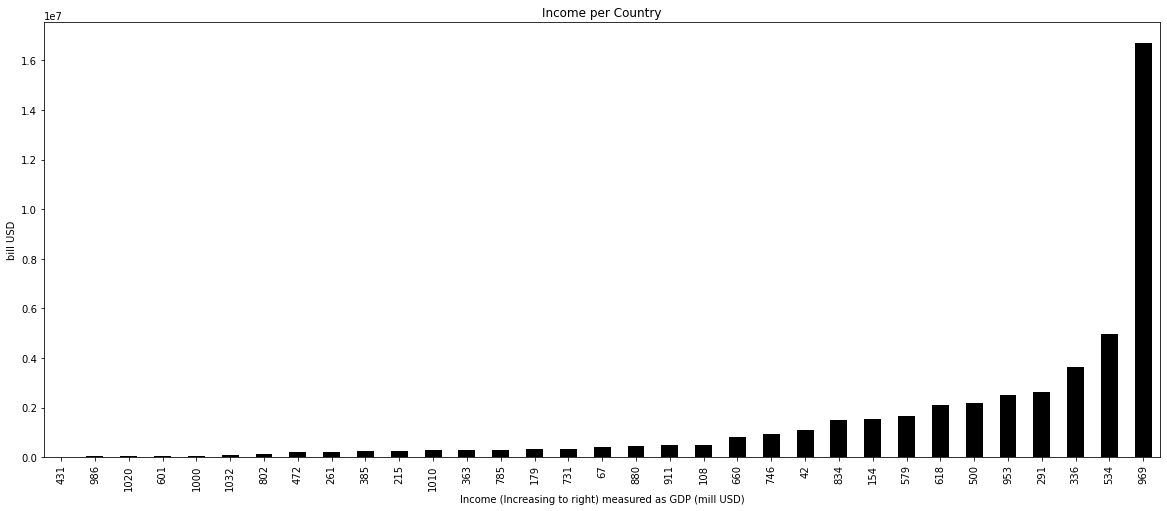

In [162]:
#  This graph shows rising national income measured as GDP by country sorted from lowest to hightest (left to right)
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
color = 'black'
mergedData_2013.sort_values('GDP (PPP) in mill USD', ascending=True)\
                            ['GDP (PPP) in mill USD']\
                            .plot(kind='bar', ax=axs, color=color)
axs.set_title('Income per Country')                            
axs.set_xlabel('Income (Increasing to right) measured as GDP (mill USD)')
axs.set_ylabel('bill USD')


Text(0, 0.5, 'mill USD')

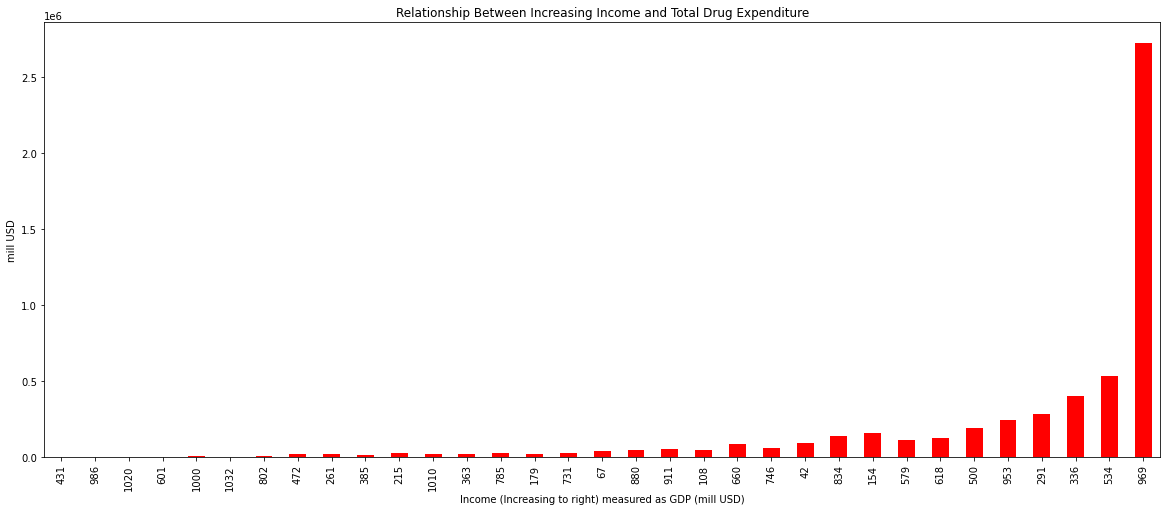

In [164]:
#  This graph shows that as national income rises, total expenditure on drugs rises as well.
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
color = 'red'
mergedData_2013.sort_values('GDP (PPP) in mill USD', ascending=True)\
                            ['Total HC Exp in mill USD']\
                            .plot(kind='bar', ax=axs, color=color)
axs.set_title('Relationship Between Increasing Income and Total Drug Expenditure')
axs.set_xlabel('Income (Increasing to right) measured as GDP (mill USD)')
axs.set_ylabel('mill USD')


Text(0, 0.5, 'mill USD')

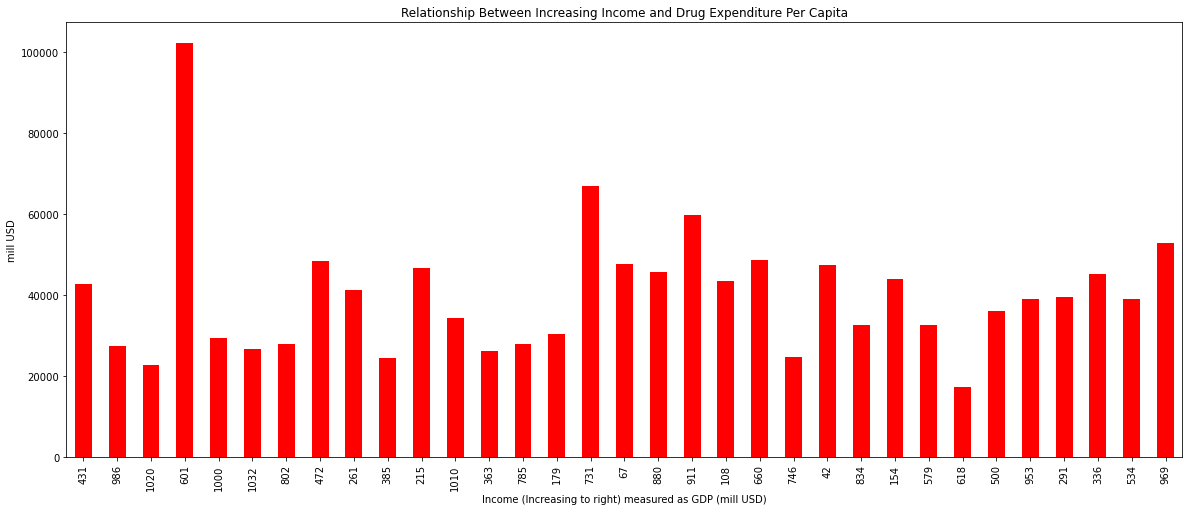

In [163]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
color = 'red'
mergedData_2013.sort_values('GDP (PPP) in mill USD', ascending=True)\
                            ['GDP (PPP) per Capita in USD']\
                            .plot(kind='bar', ax=axs, color=color)
axs.set_title('Relationship Between Increasing Income and Drug Expenditure Per Capita')
axs.set_xlabel('Income (Increasing to right) measured as GDP (mill USD)')
axs.set_ylabel('mill USD')